In [8]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
# Create a binary classification dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2,n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

In [36]:
X

array([[ 0.78399016,  0.39945361],
       [ 0.40174795, -0.23744047],
       [-1.72528357, -1.79556234],
       ...,
       [-0.55994246,  0.56968657],
       [ 1.91571703,  1.71241097],
       [-1.67557163, -1.71590056]])

In [37]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
tf.random.set_seed(52)

my_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='leaky_relu'),
    tf.keras.layers.Dense(40, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [49]:
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.BinaryFocalCrossentropy, metrics=['accuracy'])

In [50]:
history = my_model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6713 - loss: 0.1528 - val_accuracy: 0.8770 - val_loss: 0.1283
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.1206 - val_accuracy: 0.8730 - val_loss: 0.1089
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.1033 - val_accuracy: 0.8700 - val_loss: 0.0973
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.0931 - val_accuracy: 0.8700 - val_loss: 0.0903
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.0872 - val_accuracy: 0.8730 - val_loss: 0.0862
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.0839 - val_accuracy: 0.8720 - val_loss: 0.0837
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.0819 - val_accuracy: 0.8740 - val_loss: 0.0820
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.0805 - val_accu

In [52]:
test_loss, test_accuracy = my_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9172 - loss: 0.0593 
Test accuracy: 90.70%


In [55]:
import matplotlib.pyplot as plt

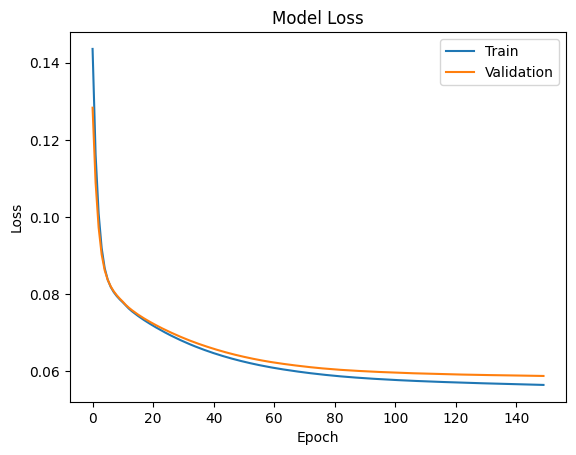

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()